In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [1]:
image_src = "data/voc/train"
a = os.listdir(image_src)[0]
image_path = os.path.join(image_src, a)
image = plt.imread(image_path)
plt.imshow(image)
plt.show

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data/voc/train'

Original Shape (323, 500, 3)
Flatten Shape (484500,)


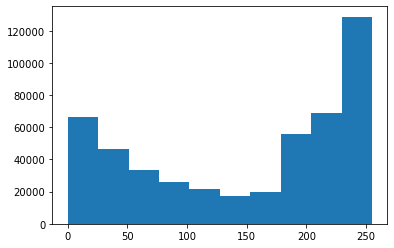

In [19]:
plt.hist(image.ravel())
print("Original Shape",image.shape)
print("Flatten Shape",image.ravel().shape)
plt.show()

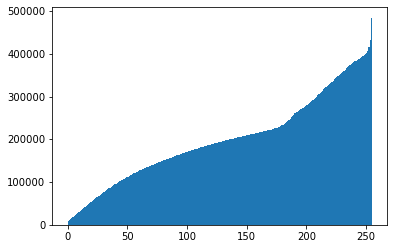

In [20]:
plt.hist(image.ravel(), bins=255, cumulative=True)
plt.show()

c:\users\prasa\appdata\local\programs\python\python36\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


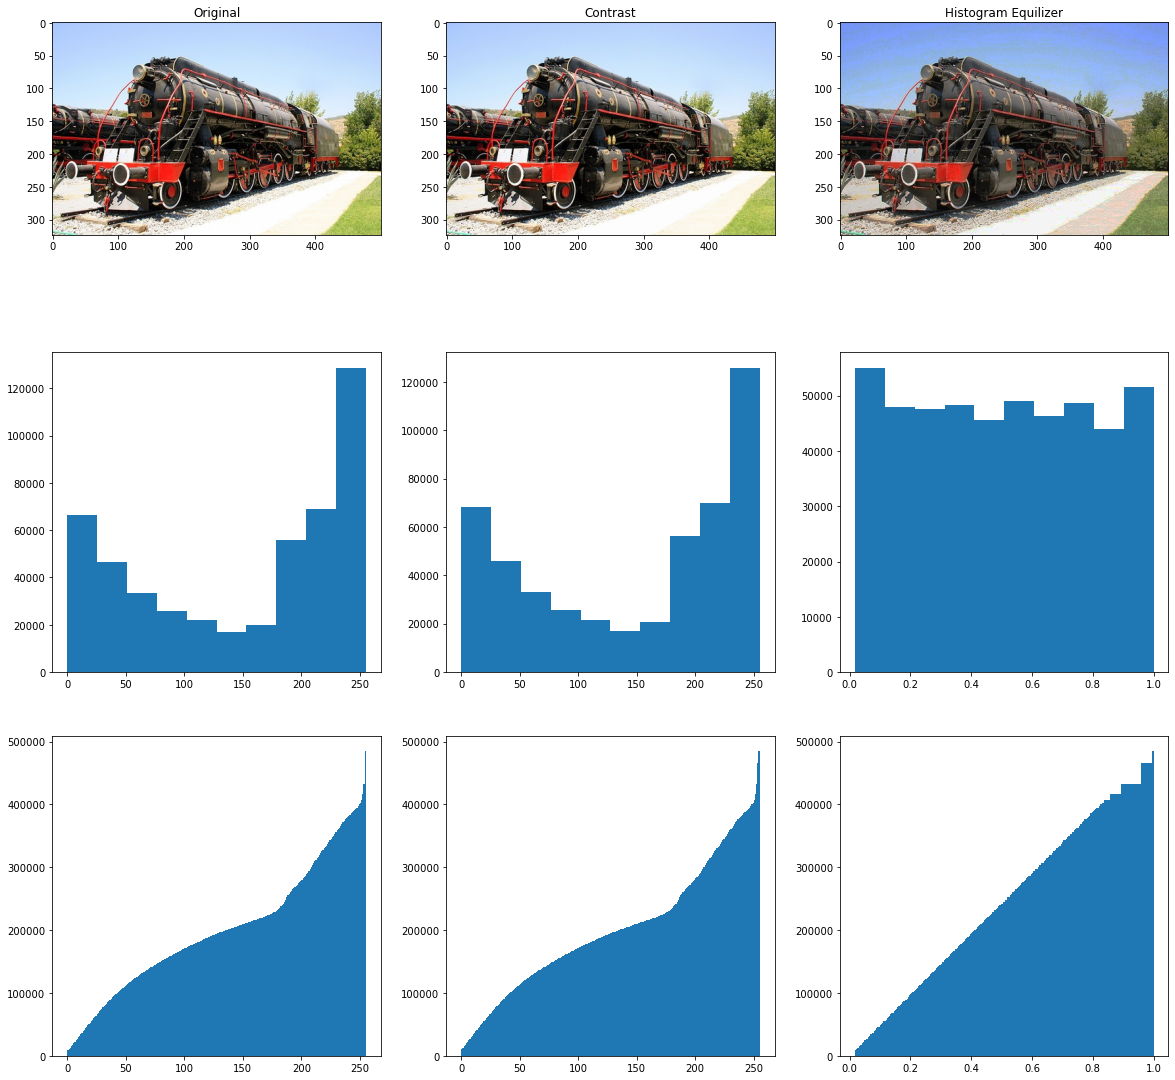

In [41]:
from skimage import exposure

p2 = np.percentile(image, 2)
p98 = np.percentile(image, 98)
image_con = exposure.rescale_intensity(image, in_range=(p2,p98))

image_eq = exposure.equalize_hist(image)


fig = plt.figure(figsize=(20,20))

a = fig.add_subplot(3,3,1)
imgplot = plt.imshow(image)
a.set_title("Original")

a = fig.add_subplot(3,3,2)
imgplot = plt.imshow(image_con)
a.set_title("Contrast")

a = fig.add_subplot(3,3,3)
imgplot = plt.imshow(image_eq)
a.set_title("Histogram Equilizer")

# Subplots for histograms
a=fig.add_subplot(3,3,4)
imgplot = plt.hist(image.ravel())

a=fig.add_subplot(3,3,5)
imgplot = plt.hist(image_con.ravel())

a=fig.add_subplot(3,3,6)
imgplot = plt.hist(image_eq.ravel())

# Subplots for CDFs

a=fig.add_subplot(3,3,7)
imgplot = plt.hist(image.ravel(), bins=255, cumulative=True)

a=fig.add_subplot(3,3,8)
imgplot = plt.hist(image_con.ravel(), bins=255, cumulative=True)

a=fig.add_subplot(3,3,9)
imgplot = plt.hist(image_eq.ravel(), bins=255, cumulative=True)

plt.show()

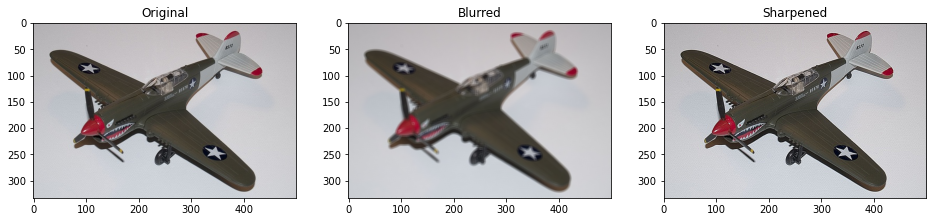

In [48]:
# Applying Fliter

from PIL import Image, ImageFilter

image_file = "data/voc/plane/002279.jpg"
image = Image.open(image_file)

blurred_image = image.filter(ImageFilter.BLUR)
sharpened_image = image.filter(ImageFilter.SHARPEN)

fig = plt.figure(figsize=(16, 12))

# Plot original image
a=fig.add_subplot(1, 3, 1)
image_plot_1 = plt.imshow(image)
a.set_title("Original")

# Plot blurred image
a=fig.add_subplot(1, 3, 2)
image_plot_2 = plt.imshow(blurred_image)
a.set_title("Blurred")

# Plot sharpened image
a=fig.add_subplot(1, 3, 3)
image_plot_3 = plt.imshow(sharpened_image)
a.set_title("Sharpened")

plt.show()

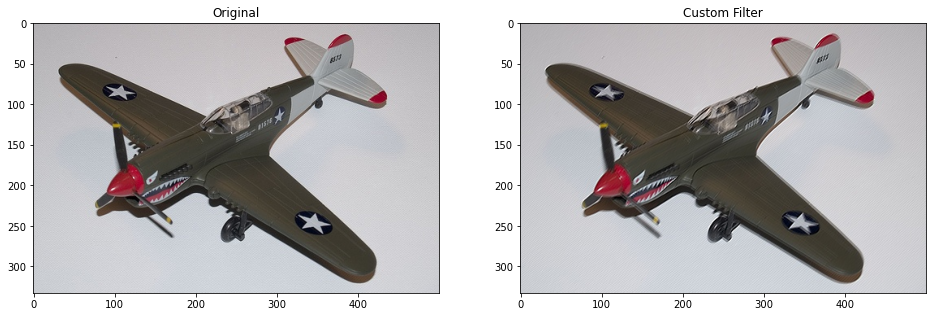

In [57]:
# Creating our own filter and applying on images(Custom Filter)
my_kernel = (200, 50, -100,
             -50, 200, -50,
            -100, 50, 200)

filtered_image = image.filter(ImageFilter.Kernel((3,3), my_kernel))


# Display it
fig = plt.figure(figsize=(16, 12))

# Plot original image
a=fig.add_subplot(1, 2, 1)
image_plot_1 = plt.imshow(image)
a.set_title("Original")

# Plot filtered image
a=fig.add_subplot(1, 2, 2)
image_plot_2 = plt.imshow(filtered_image)
a.set_title("Custom Filter")

plt.show()

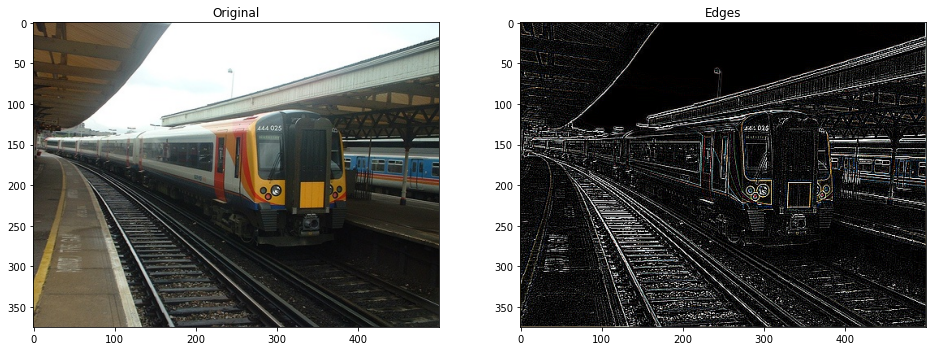

In [73]:
# For detecting edges
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter


# Load the image from the source fil
image_file = "data/voc/train/000946.jpg"
image = Image.open(image_file)

edges_image = image.filter(ImageFilter.FIND_EDGES)

# Display it
fig = plt.figure(figsize=(16, 12))

# Plot original image
a=fig.add_subplot(1, 2, 1)
image_plot_1 = plt.imshow(image)
a.set_title("Original")

# Plot filtered image
a=fig.add_subplot(1, 2, 2)
image_plot_2 = plt.imshow(edges_image)
a.set_title("Edges")

plt.show()

In [74]:
def edge_sobel(image):
    from scipy import ndimage
    import skimage.color as sc
    import numpy as np
    image = sc.rgb2gray(image) # Convert color image to gray scale
    dx = ndimage.sobel(image, 1)  # horizontal derivative
    dy = ndimage.sobel(image, 0)  # vertical derivative
    mag = np.hypot(dx, dy)  # magnitude
    mag *= 255.0 / np.amax(mag)  # normalize (Q&D)
    mag = mag.astype(np.uint8)
    return mag

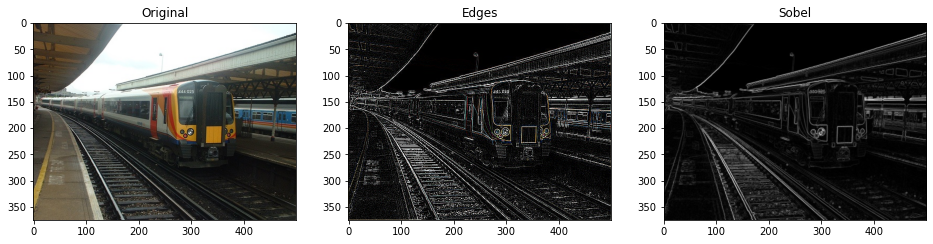

In [78]:
sobel_image = edge_sobel(np.array(image))
fig = plt.figure(figsize=(16, 12))

# Plot original image
a=fig.add_subplot(1, 3, 1)
image_plot_1 = plt.imshow(image)
a.set_title("Original")

# Plot PIL FIND_EDGES image
a=fig.add_subplot(1, 3, 2)
image_plot_2 = plt.imshow(edges_image)
a.set_title("Edges")

# Plot Sobel image
a=fig.add_subplot(1, 3, 3)
image_plot_2 = plt.imshow(sobel_image, cmap="gray") # Need to use a gray color map as we converted this to a grayscale image
a.set_title("Sobel")

plt.show()

In [ ]:
# Shape of images

In [1]:
print("GitHub")

GitHub
